## **DATA AUGMENTATION**

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Nuclio/DL/Clases/' # Ajustar el directorio raíz de Google Drive

Mounted at /content/drive/


#### **- Cargando el conjunto de datos**

In [ ]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

170498071/170498071 [==============================] - 2s 0us/step


#### **- Acondicionando el conjunto de datos**

In [ ]:
# PREPROCESADO DE LOS DATOS
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainY.shape)
print(testY.shape)

# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)
print(trainX.shape)
print(testX.shape)

(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Este objeto es el que se va a encargar de hacer las transformaciones para
aumentar los datos
'''

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotación aleatoria
    width_shift_range=0.1, # fracción del total (1) para mover la imagen
    height_shift_range=0.1, # fracción del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    # shear_range=0, # deslizamiento
    # zoom_range=0.1, # rango de zoom
    # fill_mode='nearest', # como rellenar posibles nuevos píxeles
    # channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen

    ##################################################
    # (X) INPUT - Definir la partición de validación
    ##################################################
)

#### **- Inspeccionando las muestras generadas sintéticamente**

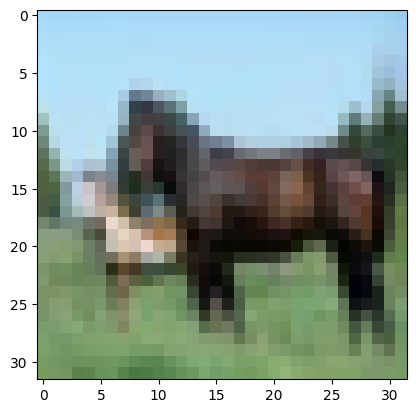

Label = Caballo


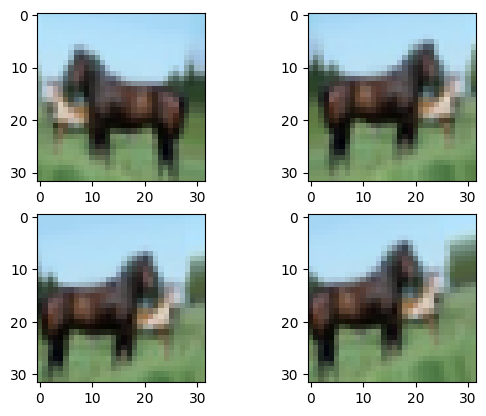

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 12
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
625/625 [==============================] - 65s 101ms/step - loss: 1.5282 - accuracy: 0.4800 - val_loss: 1.1868 - val_accuracy: 0.5727
Epoch 2/50
625/625 [==============================] - 56s 89ms/step - loss: 0.9895 - accuracy: 0.6499 - val_loss: 0.8465 - val_accuracy: 0.7026
Epoch 3/50
625/625 [==============================] - 58s 93ms/step - loss: 0.8188 - accuracy: 0.7128 - val_loss: 0.7465 - val_accuracy: 0.7404
Epoch 4/50
625/625 [==============================] - 56s 90ms/step - loss: 0.7194 - accuracy: 0.7482 - val_loss: 0.6412 - val_accuracy: 0.7760
Epoch 5/50
625/625 [==============================] - 57s 92ms/step - loss: 0.6530 - accuracy: 0.7728 - val_loss: 0.6958 - val_accuracy: 0.7603
Epoch 6/50
625/625 [==============================] - 56s 90ms/step - loss: 0.5977 - accuracy: 0.7948 - val_loss: 0.6420 - val_accuracy: 0.7837
Epoch 7/50
625/625 [==============================] - 56s 90ms/step - loss: 0.5658 - accuracy: 0.8042 - val_loss: 0.5933 - val_accuracy

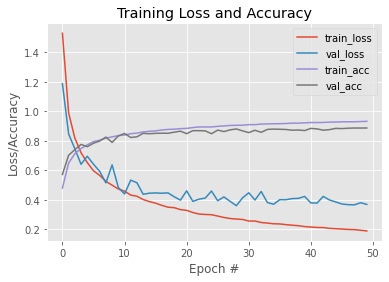

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))
# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_aug = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

#### HASTA AQUÍ TODO IGUAL

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

train_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=128,
  subset= # (X) INPUT - Definir la partición de entrenamiento
)

validation_generator = datagen.flow(
  trainX,
  trainY,
  batch_size=128,
  subset= # (X) IMPUT - Definir la partición de validación
)

data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real, con esto duplicamos el dataset

H_aug = model_aug.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//128, #dividido entre batch size
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//128,
            workers = data_aug_factor, # número máximo de procesos en paralelo para el preprocesamiento de datos
            epochs = 50)


# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_aug.save(BASE_FOLDER+"deepCNN_CIFAR10_aug.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción
predictions = model_aug.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Resultado: Mejora de accuracy (gracias a que tenemos más muestras)

**EJERCICIO PROPUESTO:** Completar las líneas de código marcadas con # (X) IMPUT en:
- train_generator
- validation_generator
- datagen

Partes a completar:

A) Llevar a cabo la partición de validation cuando se instancia el objeto ImageDataGenerator

B) Asignar correctamente las muestras generadas de train y validation al método flow de train_generator y validation_generator

Consultar documentación:
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow
